# Creating a guess on a moive I'd like

This is done using data from a years worth of movie watching and rating them.


In [1]:
#Import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2023-01-09 17:10:53.188220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import Dataset
movies = pd.read_excel('/Users/benjaminhogan/Documents/Python Coding Documents/Jupyter Notebook Document-Scripts-Files/Movies Recomendations/Movies(Input).xlsx')
movies.head()

,Title,Runtime,Rating,Gerne,Sub Gerne,Score: Ben,Score: Sophia
0,The 355,124,PG-13,Thriller,Action,3.0,4.0
1,Scream,116,R,Horror,NaN,4.0,5.0
2,Jackass Forever,96,R,Comedy,NaN,7.0,5.0
3,Death on the Nile,127,PG-13,Mystery,Thriller,6.0,6.0
4,Marry Me,112,R,Romance,Comedy,5.0,6.0


In [3]:
# Clean up dataset

# Import the modules
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split

# Fill empty Sub Gerne cells with 'None'
movies['Sub Gerne'].fillna('None', inplace = True)

# One-hot encoding
movies_one_hot = pd.get_dummies(movies)
movies_one_hot.head()

# Normalize
mms = MinMaxScaler()
scalerb = MinMaxScaler(feature_range=(0, 1))
scalers = MinMaxScaler(feature_range=(0, 1))
movies_one_hot[['Runtime ']] = mms.fit_transform(movies_one_hot[['Runtime ']])
movies_one_hot[['Score: Ben']] = scalerb.fit_transform(movies_one_hot[['Score: Ben']])
movies_one_hot[['Score: Sophia']] = scalers.fit_transform(movies_one_hot[['Score: Sophia']])

movies_norm = movies_one_hot

movies_norm.head()


,Runtime,Score: Ben,Score: Sophia,Title_Amsterdam,Title_Avatar: The Way of Water,Title_Black Adam,Title_Black Panther: Wakanda Forever,Title_Bullet Train,Title_DC Leauge Super-Pets,Title_Death on the Nile,...,Gerne_War,Sub Gerne_Action,Sub Gerne_Action/Adventure,Sub Gerne_Comedy,Sub Gerne_Drama,Sub Gerne_Family,Sub Gerne_None,Sub Gerne_Superhero,Sub Gerne_Thriller,Sub Gerne_War
0,0.291667,0.125,0.375,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.208333,0.250,0.500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.000000,0.625,0.500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.322917,0.500,0.625,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.166667,0.375,0.625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Splitting up the data

# Independent Vairables (Inputs)
X = movies_norm.drop('Score: Ben', axis=1)
X = X.drop('Score: Sophia', axis=1)

# Dependent Vairables (Labels)
y_b = movies_norm['Score: Ben']
y_s = movies_norm['Score: Sophia']

In [5]:
# Creating training and test sets
# Import the modules
from sklearn.model_selection import train_test_split

# Create Ben's train and test set
X_b_train = X[:26]
X_b_test = X[22:26]
y_b_train = y_b[:26]
y_b_test = y_b[22:26]

# Create Sophia's train and test set
X_s_train = X[:26]
X_s_test = X[22:26]
y_s_train = y_s[:26]
y_s_test = y_s[22:26]




In [6]:
# Create a model based upon Ben's score

# Set seed
tf.random.set_seed(42)

# Pt 1: Make the model
model_b1 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Pt 2: Compile the model
model_b1.compile(loss='mae',
                optimizer='Adam',
                metrics=['mse'])

# Pt 3: Fit the model
history_b1 = model_b1.fit(X_b_train, y_b_train, epochs=200, verbose=0)


2023-01-09 17:10:57.748046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Pt 4: Evaluate the model
model_b1.evaluate(X_b_test, y_b_test)

1/1 [==============================] - 0s 99ms/step - loss: 0.0018 - mse: 7.5790e-06


[0.001809641718864441, 7.579020348202903e-06]

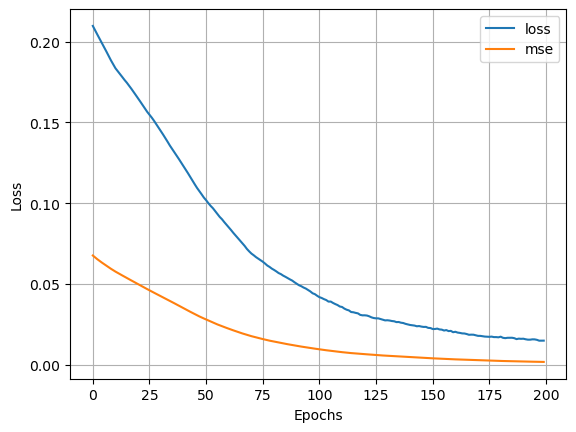

In [8]:
# Plot history (Also known as a loss curve or a traning curve)
pd.DataFrame(history_b1.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.savefig('Epochs vs. Loss.png')

In [9]:
# The model's predictions
y_preds_b1 = model_b1.predict(X)
y_preds_b1 = scalerb.inverse_transform(y_preds_b1)
y_preds_b1 = np.concatenate(y_preds_b1).ravel()
y_preds_b1 = np.round(y_preds_b1,2)



2/2 [==============================] - 0s 2ms/step


In [10]:
results = pd.DataFrame(np.column_stack([movies['Title'], movies['Score: Ben'], y_preds_b1]), columns=['Title', 'Actual Score', 'Predicted Score'])
results

,Title,Actual Score,Predicted Score
0,The 355,3.0,3.0
1,Scream,4.0,3.99
2,Jackass Forever,7.0,6.99
3,Death on the Nile,6.0,6.0
4,Marry Me,5.0,4.99
5,The Batman,8.0,8.01
6,The Lost City,4.0,4.0
7,Sonic the Hedgehog 2,6.0,5.99
8,The Unbearable Weight of Massive Talent,6.0,6.01
9,Doctor Strange and the Multiverse of Madness,5.0,5.01


In [11]:
# Now to create a model based on Sophia's Scores
# Set seed
tf.random.set_seed(42)

# Pt 1: Make the model
model_s1 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Pt 2: Compile the model
model_s1.compile(loss='mae',
                optimizer='Adam',
                metrics=['mse'])

# Pt 3: Fit the model
history_s1 = model_s1.fit(X_s_train, y_s_train, epochs=175, verbose=0)

In [12]:
# Pt 4: Evaluate the model
model_s1.evaluate(X_s_test, y_s_test)

1/1 [==============================] - 0s 77ms/step - loss: 0.0020 - mse: 6.9660e-06


[0.0019950270652770996, 6.966004093555966e-06]

In [13]:
# The model's predictions
y_preds_s1 = model_s1.predict(X)
y_preds_s1 = scalers.inverse_transform(y_preds_s1)
y_preds_s1 = np.concatenate(y_preds_s1).ravel()
y_preds_s1 = np.round(y_preds_s1,2)


2/2 [==============================] - 0s 2ms/step


In [14]:
result = pd.DataFrame(np.column_stack([movies['Title'], movies['Score: Sophia'], y_preds_s1]), columns=['Title', 'Actual Score', 'Predicted Score'])
result

,Title,Actual Score,Predicted Score
0,The 355,4.0,4.01
1,Scream,5.0,5.0
2,Jackass Forever,5.0,4.99
3,Death on the Nile,6.0,6.0
4,Marry Me,6.0,5.98
5,The Batman,8.0,7.99
6,The Lost City,3.0,2.98
7,Sonic the Hedgehog 2,9.0,8.38
8,The Unbearable Weight of Massive Talent,6.0,6.0
9,Doctor Strange and the Multiverse of Madness,7.0,7.01


In [15]:
# Calculate the Root mean squared deviation
import math

def rmse(prediction, target, n):
    return math.sqrt(((prediction-target)**2)/n)

rmse_s = []
rmse_b = []

for i in range(len(movies['Score: Ben'])):
    error = rmse(y_preds_s1[i], movies.at[i,'Score: Sophia'], len(y_preds_s1))
    rmse_s.append(error)
    error = rmse(y_preds_b1[i], movies.at[i,'Score: Ben'], len(y_preds_b1))
    rmse_b.append(error)

error_s = np.asarray(rmse_s)
error_b = np.asarray(rmse_b)
    

In [16]:
# DataFrame of both networks to show our taste in moives

all_results = pd.DataFrame({'Title': movies['Title'], 
                                            "Sophia's Actual Score": movies['Score: Sophia'],
                                            "Sophia's Predicted Score": y_preds_s1.astype(float).round(4), 
                                            "Model's RSME Sophia": error_s.astype(float).round(4),
                                            "Ben's Actual Score": movies['Score: Ben'],
                                            "Ben's Predicted Score": y_preds_b1.astype(float).round(4), 
                                            "Model's RSME Ben": error_b.astype(float).round(4)})
all_results.head()
            


,Title,Sophia's Actual Score,Sophia's Predicted Score,Model's RSME Sophia,Ben's Actual Score,Ben's Predicted Score,Model's RSME Ben
0,The 355,4.0,4.01,0.0017,3.0,3.00,0.0000
1,Scream,5.0,5.00,0.0000,4.0,3.99,0.0017
2,Jackass Forever,5.0,4.99,0.0017,7.0,6.99,0.0017
3,Death on the Nile,6.0,6.00,0.0000,6.0,6.00,0.0000
4,Marry Me,6.0,5.98,0.0034,5.0,4.99,0.0017


In [17]:
# Do some Excel Formmating 

#Excel writer using XlsxWriter
writer = pd.ExcelWriter('Movie_Scores(Output).xlsx', engine='xlsxwriter')

# Write the data to Xlsxwriter
all_results.to_excel(writer, sheet_name='Predictions', startrow=1, header=False, index=False)

# Get the xlsxwriter workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Predictions']

# Get the dimensions of the dataframe
(max_row, max_col) = all_results.shape

# Create a list of column headers, to use in add_table()
column_settings = [{'header': column} for column in all_results.columns]

# Add the Excel Table structure 
worksheet.add_table(0,0,max_row, max_col-1, {'columns': column_settings})

# Make the columns wider
worksheet.set_column(1, max_col - 1, 15)
# fit first column
worksheet.set_column(0,0,50)

# Add a format. Light red fill with dark red text.
format1 = workbook.add_format({'bg_color': '#FFC7CE',
                               'font_color': '#9C0006'})

# Add a format. Green fill with dark green text.
format2 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100'})

# Apply some conditional formating

# Write a conditional format over a range.
worksheet.conditional_format(f'D2:D{max_row+1}', {'type': 'cell',
                                         'criteria': '>=',
                                         'value': 0.2,
                                         'format': format1})

# Write another conditional format over the same range.
worksheet.conditional_format(f'D2:D{max_row+1}', {'type': 'cell',
                                         'criteria': '<=',
                                         'value': 0.2,
                                         'format': format2})

worksheet.conditional_format(f'G2:G{max_row+1}', {'type': 'cell',
                                         'criteria': '>=',
                                         'value': 0.2,
                                         'format': format1})

# Write another conditional format over the same range.
worksheet.conditional_format(f'G2:G{max_row+1}', {'type': 'cell',
                                         'criteria': '<=',
                                         'value': 0.2,
                                         'format': format2})

#Close 
writer.close()

